##  Name: Narasimha Gundavarapu
## USC ID: 4784512020

## 1. Combined Cycle Power Plant Data Set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### a) Download the Combined Cycle Power Plant data

In [2]:
file = pd.ExcelFile('../data/CCPP/Folds5x2_pp.xlsx')

### b) Exploring the data:
#### i) How many rows are in this data set? How many columns? What do the rows and columns represent?

In [3]:
df = pd.read_excel(file, 'Sheet1')
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


There are 9568 rows and 5 columns. The rows represent the 9568 datapoints collected from a Combined Cycle Power Plant over 6 years (2006-2011), while columns represent the ambient variable temperature (AT), exhaust vaccum (V), Ambient Pressure (AP), Relative Humidity (RH) which are used to predict the net hourly electrical energy output (PE) of the plant.

#### ii) Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.

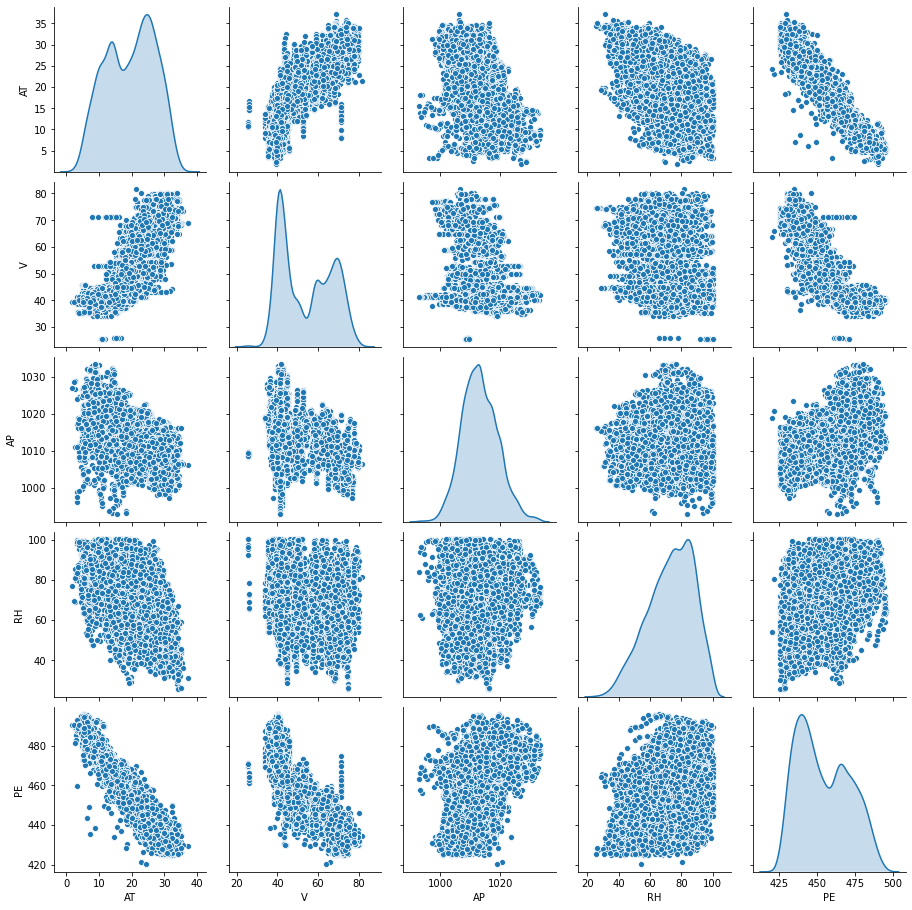

In [4]:
sns.pairplot(df, diag_kind="kde")

The dependent variable energy output PE seems to be in a linear relation with temperature (AT) and exhaust vaccum (V). When these variables increase, the output is decreasing. The other two independent variables Ambient Pressure (AP), Relative Humidity (RH) do not seem to have a linear relation with the dependent variable.

#### iii) What are the mean, the median, range, first and third quartiles, and in- terquartile ranges of each of the variables in the dataset? Summarize them in a table.
- I am using a library called tabulate to show the table better. It is needed to be installed before the following code can work. I'll put in requirements.txt.

In [5]:
from tabulate import tabulate
tab_data = pd.DataFrame({"Mean": df.mean(), "Median": df.median(), "Range": list(zip(df.min(), df.max())), 
                         "First Quartiles": df.quantile(0.25), "Third Quartiles": df.quantile(0.75), 
                        "Interquartile Range": df.quantile(0.75) - df.quantile(0.25)})
print(tabulate(tab_data, headers="keys", tablefmt = "grid"))

+----+-----------+----------+------------------+-------------------+-------------------+-----------------------+
|    |      Mean |   Median | Range            |   First Quartiles |   Third Quartiles |   Interquartile Range |
+====+===========+==========+==================+===================+===================+=======================+
| AT |   19.6512 |   20.345 | (1.81, 37.11)    |           13.51   |             25.72 |               12.21   |
+----+-----------+----------+------------------+-------------------+-------------------+-----------------------+
| V  |   54.3058 |   52.08  | (25.36, 81.56)   |           41.74   |             66.54 |               24.8    |
+----+-----------+----------+------------------+-------------------+-------------------+-----------------------+
| AP | 1013.26   | 1012.94  | (992.89, 1033.3) |         1009.1    |           1017.26 |                8.16   |
+----+-----------+----------+------------------+-------------------+-------------------+--------

### c) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

Coefficient for AT : -2.17131
Intercept for AT : 497.0341
Coefficient for V : -1.16813
Intercept for V : 517.8015
Coefficient for AP : 1.489871
Intercept for AP : -1055.26
Coefficient for RH : 0.455650
Intercept for RH : 420.9617


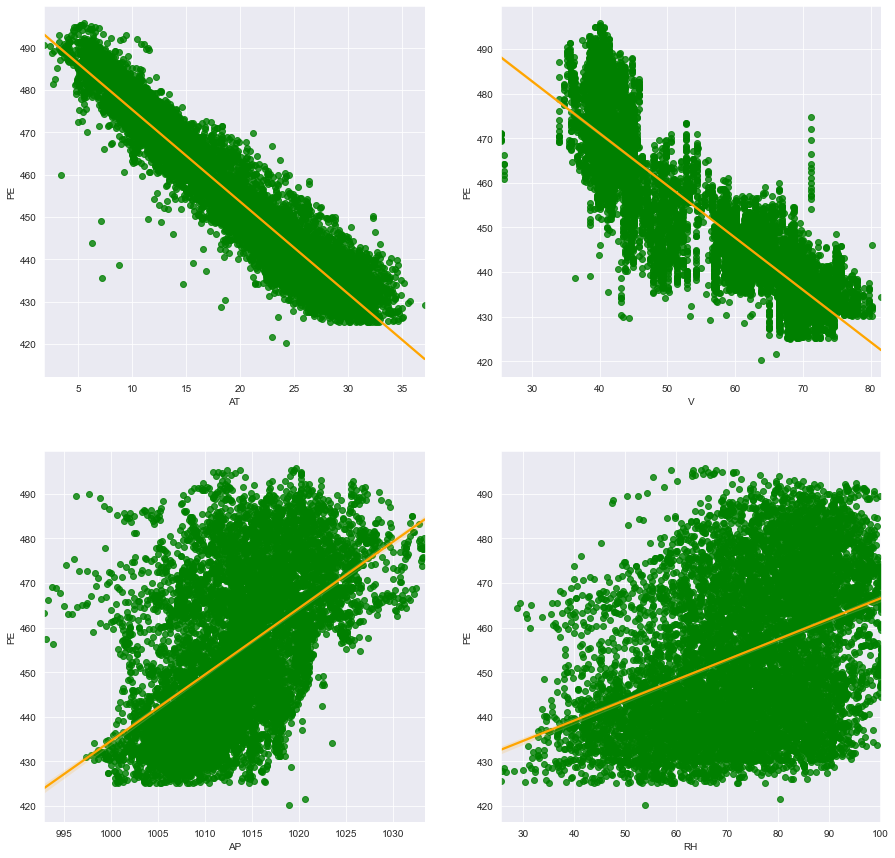

In [103]:
from sklearn import linear_model

X_labels = ["AT", "V", "AP", "RH"]
y_data = df['PE']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
coeff_u = []

for (i, label) in enumerate(X_labels):
    X_data = np.c_[np.ones(df[label].shape),df[label]] 
    model = linear_model.LinearRegression()
    pred_u = model.fit(X_data, y_data)
    coeff_u.append(pred_u.coef_[1])
    print("Coefficient for " + label + " : " + str(pred_u.coef_[1])[:8])
    print("Intercept for " + label + " : " + str(pred_u.intercept_)[:8])
    sns.set_style("darkgrid")
    sns.regplot(x=label, y="PE", data=df, scatter=True, line_kws= {'color':'orange'}, color='g', ax=axs[i // 2,i % 2])
    

1. From the above plots, we can see that temperature (AT) and exhaust vaccum (EV) have very strong and statistically significant relationship with the response energy output (PE). 
2. There are outliers present in this data. In AT vs PE graph, we can see values very distant from the regression line at AT values ranging from 4 to 10. In V vs PE graph, we can see some values are observed at V = 0 but there are none until V ~ 35 again, simliar situation happens at V =70. In PE vs AP graph, we can observe outliers for AP (990, 996]. In RH VS PE graph, there are some points at RH=100, that appear to be outliers and these could be altering the regression output.

### d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 :βj =0?

In [58]:
from sklearn.metrics import mean_squared_error, r2_score
X_data = np.c_[np.ones(df[['AT', 'V', 'AP', 'RH']].shape),df[['AT', 'V', 'AP', 'RH']]] 
y_data = df['PE']

model = linear_model.LinearRegression()
pred_m = model.fit(X_data, y_data)
print("Coefficients" + " : " + str(pred_m.coef_[4:8]))
print("Intercept" + " : " + str(pred_m.intercept_)[:8])
print('R^2 Score :', r2_score(y_data, pred.predict(X_data)))

Coefficients : [-1.97751311 -0.23391642  0.06208294 -0.1580541 ]
Intercept : 454.6092
R^2 Score : 0.9286960898122537


Although the model’s R-squared is greater than 90%, the variance of its errors is less than the variance of the dependent variable, p-values determine our ability to reject the null hypothesis H0: βj = 0. The following piece of code uses statsmodel to get the summary of this regression.

In [57]:
import statsmodels.api as sa
X_con = sa.add_constant(df[['AT', 'V', 'AP', 'RH']])
mod = sa.OLS(y_data, X_con)
table = mod.fit()
print(table.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        19:27:24   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

The table shows that the p-values for every independent variable are less than 0.05. This shows that all the variables show statistical significance on the dependent variable. Therefore, we can reject the null hypothesis, H0: βj = 0.

### (e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

Text(0.5, 1.0, 'Plot showing the coefficients of AT, V, AP, RH from left to right')

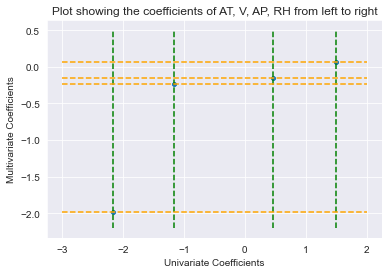

In [88]:
coeff_m = pred_m.coef_[4:8]
d = {'Univariate Coefficients': coeff_u, 'Multivariate Coefficients': coeff_m}
plot_data = pd.DataFrame(d)
sns.set_style("darkgrid")
ax = sns.scatterplot(x='Univariate Coefficients', y='Multivariate Coefficients', data=plot_data)
ax.vlines(coeff_u, -2.2, 0.5, colors='green', linestyles='dashed')
ax.hlines(coeff_m, -3, 2, colors='orange', linestyles='dashed')
ax.set_title('Plot showing the coefficients of AT, V, AP, RH from left to right')

As we can see in this plot, there is a difference between the values of coefficients in univariate and multivariate regressions. This is an evidence that proves we cannot make decisions just based off univariate coefficients.

### f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form Y = β_0 +β_1X+β_2X^2 +β_3X^3 +ε

+----+-------------+---------------+---------------+-------------+--------------+----------------------+----------+
|    | Variables   |     Intercept |            β1 |          β2 |           β3 |   Mean Squared Error |      R^2 |
+====+=============+===============+===============+=============+==============+======================+==========+
|  0 | AT          | 492.728       |     -0.610346 | -0.125138   |  0.00267485  |              25.6643 | 0.911883 |
+----+-------------+---------------+---------------+-------------+--------------+----------------------+----------+
|  1 | V           | 554.147       |     -2.14438  | -0.00271228 |  0.000134357 |              65.5253 | 0.775022 |
+----+-------------+---------------+---------------+-------------+--------------+----------------------+----------+
|  2 | AP          |   5.23622e+06 | -15460.9      | 15.2163     | -0.00499116  |             204.592  | 0.297543 |
+----+-------------+---------------+---------------+-------------+------

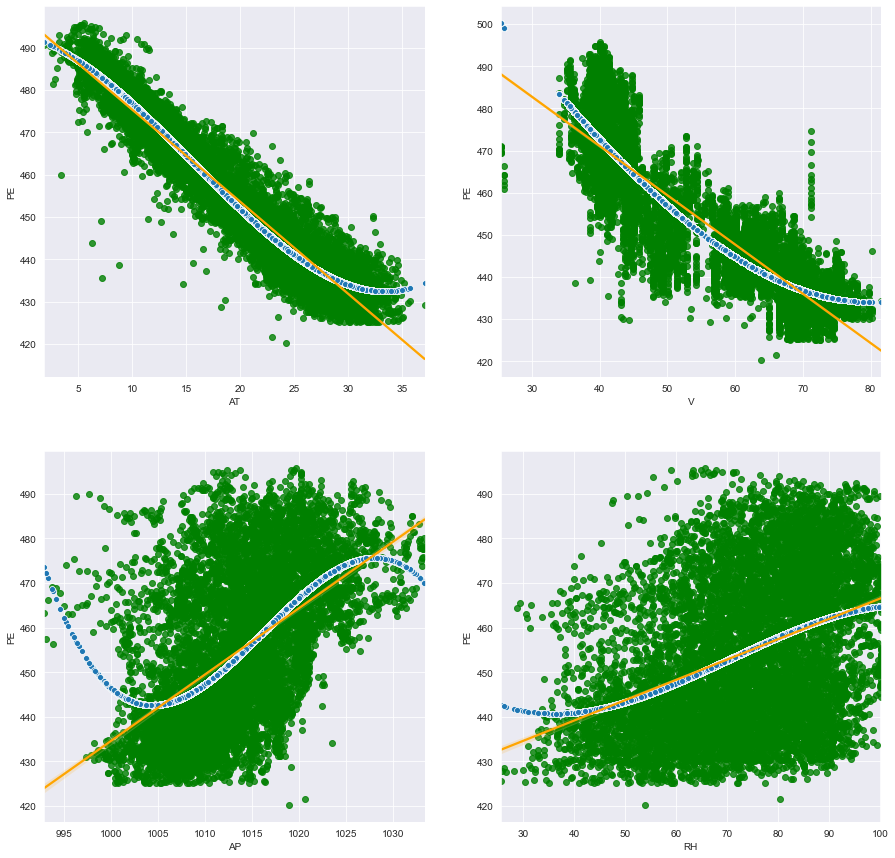

In [109]:
from sklearn.preprocessing import PolynomialFeatures

X_labels = ["AT", "V", "AP", "RH"]
# cols = ['Intercept', 'β1', 'β2', 'β3', 'MSE', 'R^2']
intercepts = []
beta1 = []
beta2 = []
beta3 = []
mse = []
r_squared = []
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

for i, label in enumerate(X_labels):
    x = df[[label]]
    mult_reg = PolynomialFeatures(degree=3)
    X_mult = mult_reg.fit_transform(x)
    X_mult = pd.DataFrame(X_mult)
    X_data = np.c_[np.ones(X_mult.shape),X_mult] 
    y_data = df['PE']
    model = linear_model.LinearRegression()
    reg = model.fit(X_data,y_data)
    pred = model.predict(X_data)
    
    intercepts.append(reg.intercept_)
    beta1.append(reg.coef_[5])
    beta2.append(reg.coef_[6])
    beta3.append(reg.coef_[7])
    mse.append(mean_squared_error(y_data,reg.predict(X_data)))
    r_squared.append(r2_score(y_data, reg.predict(X_data)))
    
    sns.regplot(x=label, y="PE", data=df, scatter=True, line_kws= {'color':'orange'}, color='g', ax=axs[i // 2,i % 2])
    sns.scatterplot(x=label, y=pred, data=df, ax=axs[i // 2,i % 2])
    
tab_data_2 = pd.DataFrame({"Variables": X_labels, "Intercept": intercepts, "β1": beta1, "β2": beta2, "β3": beta3, "Mean Squared Error": mse,
                          "R^2": r_squared})
print(tabulate(tab_data_2, headers="keys", tablefmt = "grid"))

As we can observe from the table and figures above, Ambient Pressure (AP) has a very high coefficient and a flexible plot. I believe there is a strong non-linear association with the response. Barring AT, the remaining predictors also have non-significant non-linear association.

### g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

In [114]:
x = df[['AT', 'V', 'AP', 'RH']]
mult_reg = PolynomialFeatures(interaction_only=True)
X_mult = mult_reg.fit_transform(x)
X_mult = pd.DataFrame(X_mult, columns = ['0','AT', 'V', 'AP', 'RH', 'AT*V', 'AT*AP', 'AT*RH', 'V*AP', 'V*RH', 'AP*RH'])
X_data = np.c_[np.ones(X_mult.shape),X_mult] 
y_data = df['PE']
reg = linear_model.LinearRegression().fit(X_data,y_data)

X_con = sa.add_constant(X_mult)
mod = sa.OLS(y_data, X_con)
table = mod.fit()
print(table.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        20:53:33   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0            685.7825     78.640      8.721      0.0

The above table displays that the AT * V (Temperature * Exhaust Vacuum), AT * RH (Temperature * Relative Humidity), V * AP (Exhaust Vacuum * Ambient Pressure), AP * RH (Ambient Pressure * Relative Humidity) all have p-value less than 0.05, which shows that they are statistically significant.

### h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.

In [139]:
from sklearn.model_selection import train_test_split

x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(df[['AT', 'V', 'AP', 'RH']], df['PE'], test_size = 0.3)
X_train_1 = np.c_[np.ones(x_train_1.shape),x_train_1] 
X_test_1 = np.c_[np.ones(x_test_1.shape),x_test_1]
reg = linear_model.LinearRegression().fit(X_train_1, y_train_1)

test_error = mean_squared_error(y_test_1, reg.predict(X_test_1))
train_error = mean_squared_error(y_train_1, reg.predict(X_train_1))

print("------------------------------------------------------------------------------")
print("Pre removal Train-Error : " + str(train_error))
print("Pre removal Test-Error : " + str(test_error))
print("------------------------------------------------------------------------------")

x = df[['AT', 'V', 'AP', 'RH']]
mult_reg = PolynomialFeatures(degree=2, interaction_only=False)
X_mult = mult_reg.fit_transform(x)
X_mult = pd.DataFrame(X_mult, columns = ['c','AT', 'V', 'AP', 'RH', 'AT*AT', 'AT*V', 'AT*AP', 'AT*RH', 'V*V', 'V*AP', 'V*RH', 'AP*AP', 'AP*RH', 'RH*RH'])
X_data = np.c_[np.ones(X_mult.shape),X_mult] 
y_data = df['PE']


label_list = ['c', 'AT*AT', 'AT*V', 'AT*AP', 'AT*RH', 'V*V', 'V*AP', 'V*RH', 'AP*AP', 'AP*RH', 'RH*RH']
list_insig = ['c']
while(len(list_insig) != 0):
    label_list = list(set(label_list) - set(list_insig))
    x_train, x_test, y_train, y_test = train_test_split(X_mult[label_list], y_data, test_size = 0.3)
    x_test = sa.add_constant(x_test)
    x_train = sa.add_constant(x_train)
    mod = sa.OLS(y_train, x_train)
    table = mod.fit()
    list_insig = [key for key, val in table.pvalues.items() if val>0.05]
print(table.summary())

x_train, x_test, y_train, y_test = train_test_split(X_mult[label_list], y, test_size = 0.3)
X_train = np.c_[np.ones(x_train.shape),x_train] 
X_test = np.c_[np.ones(x_test.shape),x_test]
reg = linear_model.LinearRegression().fit(X_train, y_train)
test_error = mean_squared_error(y_test, reg.predict(X_test))
train_error = mean_squared_error(y_train, reg.predict(X_train))
print("------------------------------------------------------------------------------")
print("Post removal Train-Error : " + str(train_error))
print("Post removal Test-Error : " + str(test_error))
print("------------------------------------------------------------------------------")

------------------------------------------------------------------------------
Pre removal Train-Error : 20.691921975382385
Pre removal Test-Error : 20.95551620130337
------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                 1.064e+04
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        21:33:29   Log-Likelihood:                -19325.
No. Observations:                6697   AIC:                         3.867e+04
Df Residuals:                    6687   BIC:                         3.874e+04
Df Model:                           9                                         
Covariance Type:            nonrobust      

After removing insiginificant variables from the data, the model perfomed better, as showcased by the data above.

### i) KNN Regression:
#### i. Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ {1,2,...,100} that gives you the best fit. Plot the train and test errors in terms of 1/k.

In [145]:
from sklearn.neighbors import KNeighborsRegressor
k_range = np.arange(1,101)
test_error_raw = np.empty(len(k_range))
train_error_raw = np.empty(len(k_range))

for i,k in enumerate(k_range):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train_1, y_train_1)
    test_error_raw[i] = mean_squared_error(y_test_1, knn.predict(x_test_1))
    train_error_raw[i] = mean_squared_error(y_train_1, knn.predict(x_train_1))

inv_k = [1/k for k in range(1,101)]
min_error_raw = np.min(test_error_raw)
k_at_min_raw = np.reshape(np.argwhere(test_error_raw == min_error_raw), (1, -1))[0] + 1

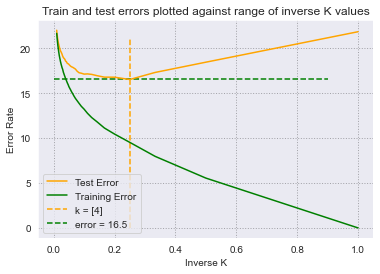

In [154]:
plt.plot(inv_k, test_error_raw, color='orange', label="Test Error")
plt.plot(inv_k, train_error_raw, color='green', label="Training Error")
plt.vlines(1/k_at_min_raw, 0, 21, colors='orange', linestyles='dashed', label='k = ' + str(k_at_min_raw))
plt.hlines(min_error_raw, 0, 0.9, colors='green', linestyles='dashed', label='error = ' + str(min_error_raw)[:4])
plt.grid(color='black', linestyle='dotted', linewidth=1,alpha=0.3)
plt.xlabel('Inverse K')
plt.ylabel('Error Rate')
plt.legend()
plt.title('Train and test errors plotted against range of inverse K values')
plt.show()

The best k is 4, where the test error is minimum with a value of 16.5

In [158]:
from sklearn.preprocessing import Normalizer
x_test_1 = Normalizer().fit_transform(x_test_1)
x_train_1 = Normalizer().fit_transform(x_train_1)
test_error_norm = np.empty(len(k_range))
train_error_norm = np.empty(len(k_range))

for i,k in enumerate(k_range):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train_1, y_train_1)
    test_error_norm[i] = mean_squared_error(y_test_1, knn.predict(x_test_1))
    train_error_norm[i] = mean_squared_error(y_train_1, knn.predict(x_train_1))

inv_k = [1/k for k in range(1,101)]
min_error_norm = np.min(test_error_norm)
k_at_min_norm = np.reshape(np.argwhere(test_error_norm == min_error_norm), (1, -1))[0] + 1

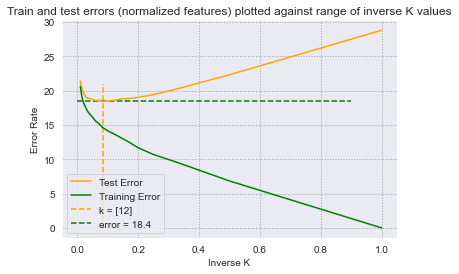

In [159]:
plt.plot(inv_k, test_error_norm, color='orange', label="Test Error")
plt.plot(inv_k, train_error_norm, color='green', label="Training Error")
plt.vlines(1/k_at_min_norm, 0, 21, colors='orange', linestyles='dashed', label='k = ' + str(k_at_min_norm))
plt.hlines(min_error_norm, 0, 0.9, colors='green', linestyles='dashed', label='error = ' + str(min_error_norm)[:4])
plt.grid(color='black', linestyle='dotted', linewidth=1,alpha=0.3)
plt.xlabel('Inverse K')
plt.ylabel('Error Rate')
plt.legend()
plt.title('Train and test errors (normalized features) plotted against range of inverse K values')
plt.show()

The best k is 12, where the test error is minimum with a value of 18.4.

### j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.

In this analysis, the smallest test error for the linear regression is 17.82 and the smallest test error for KNN regression is 16.5 which is smaller than the linear regression. So, I think it is best to use KNN Regression on this dataset.

## 2. ISLR 2.4.1
### For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.
### (a) The sample size n is extremely large, and the number of predictors p is small.
- When the sample size is very large and we have small number of predictors, there will be higher degrees of freedom. In this case, choosing a flexible statistical method would be better than choosing an inflexible method.

### (b) The number of predictors p is extremely large, and the number of observations n is small.
- When the number of predictors p are extremely large and the number of observations n are small, there will be low degree of freedom. An inflexible model like Linear Regression would determine the trend perfectly.

### (c) The relationship between the predictors and response is highly non-linear.
- When the relationship between the predictors and response is highly non-linear, we again need to choose a model which is flexible. We can underfit the data if a model with less flexibility is chosen.

### (d) The variance of the error terms, i.e. σ2 = Var(ε), is extremely high.
- When the variance is high, an inflexible model is better than a flexible model. As the variance is already high, we do not want to increase it further by choosing a flexible statistical learning method.

## 3. ISLR 2.4.7
### The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.
| Obs. | X1 | X2 | X3 | Y
| :--- | :- | :- | :- | :--
| 1 | 0 | 3 | 0 | Red
| 2 | 2 | 0 | 0 | Red
| 3 | 0 | 1 | 3 | Red
| 4 | 0 | 1 | 2 | Green 
| 5 | −1 | 0 | 1 | Green 
| 6 | 1 | 1 | 1 | Red

### Suppose we wish to use this data set to make a prediction for Y when $X_1 = X_2 = X_3 = 0$ using K-nearest neighbors.

### a) Compute the Euclidean distance between each observation and thetestpoint, $X_1 = X_2 = X_3 = 0$
- The euclidian distance is defined as $\sqrt{(X_1 - X_2)^2 + (Y_1 - Y_2)^2 + (Z_1 - Z_2)^2}$, if the points in consideration are $(X_1, Y_1, Z_1) ,  (X_2, Y_2, Z_2) $. And as the point in consideration is $X_1 = X_2 = X_3 = 0$, euclidian distances can be calculated as follows
- For obs 1 --> $\sqrt{(0)^2 + (3)^2 + (0)^2}$ --> $\sqrt{9}$ --> 3
- For obs 2 --> $\sqrt{(2)^2 + (0)^2 + (0)^2}$ --> $\sqrt{4}$ --> 2
- For obs 3 --> $\sqrt{(0)^2 + (1)^2 + (3)^2}$ --> $\sqrt{10}$ --> 3.162
- For obs 4 --> $\sqrt{(0)^2 + (1)^2 + (2)^2}$ --> $\sqrt{5}$ --> 2.236
- For obs 5 --> $\sqrt{(-1)^2 + (0)^2 + (1)^2}$ --> $\sqrt{2}$ --> 1.414
- For obs 6 --> $\sqrt{(1)^2 + (1)^2 + (1)^2}$ --> $\sqrt{3}$ --> 1.732

### b) What is our prediction with K = 1? Why?
- With K = 1, we consider only one nearest neighbor and from the values above, it is obs5 and it has a Y value of 'Green'. So that implies our prediction would be 'Green'.

### c) What is our prediction with K = 3? Why?
- With K = 3, we consider three nearest neighbors and from the values above, they are obs5, obs6 and obs2. They have Y value of Green, Red and Red respectively. As there are more 'Red's in the neighborhood, we predict the label to be 'Red'.

### d) If the Bayes decision boundary in this problem is highly non- linear, then would we expect the best value for K to be large or small? Why?
- If Bayes decision boundary is highly non-linear, that would mean highly flexible mode. That would imply a smaller K. So I would presume, that the best value for K would be small.  